In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the data into a dataframe
df = pd.read_csv('iris.csv')
print(df.info)

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>


In [3]:
# View the top 5 entries
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# View bottom 5 entries
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# View some random samples
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,5.7,3.0,4.2,1.2,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa


In [6]:
# check for missing values
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


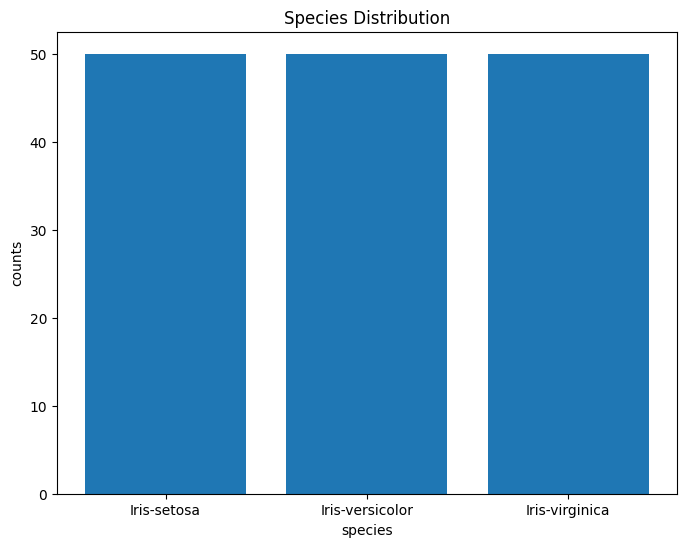

In [7]:
# view class distribution
class_labels = df['Species'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(class_labels.index , class_labels.values)
plt.xlabel('species')
plt.ylabel('counts')
plt.title("Species Distribution")
plt.savefig('diagram1.png')
plt.show()

<Axes: >

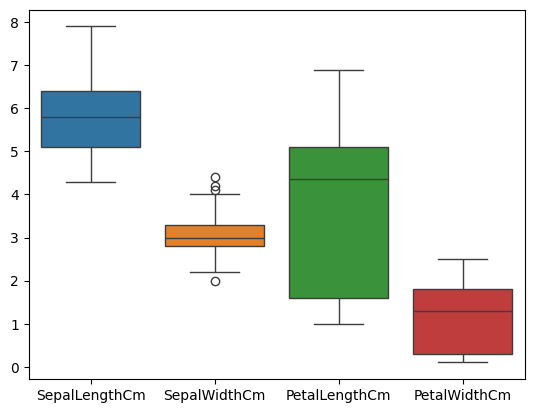

In [8]:
# compute the boxplot
import seaborn as sns
sns.boxplot(data=df)

In [9]:
# seperate the data into X and Y
x = df.drop(columns=['Species'])
y = df['Species']


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [11]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [12]:
acc_list = []
for k in range(1,21):
    model = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=k))
    model.fit(x_train,y_train)
    y_preds = model.predict(x_test)
    acc_list.append(accuracy_score(y_test,y_preds))

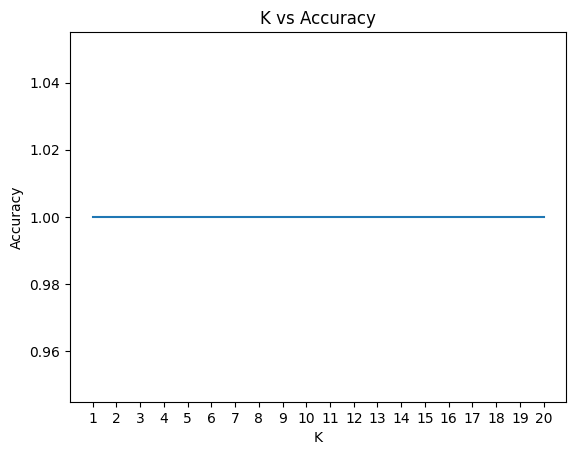

In [13]:
plt.plot(range(1,21),acc_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(1,21))
plt.title('K vs Accuracy')
plt.show()

In [14]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
acc_list.append(accuracy_score(y_test,y_preds))
print(f'Accuracy = {accuracy_score(y_test,y_preds)*100}')
print('\n',classification_report(y_test,y_preds))

Accuracy = 100.0

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



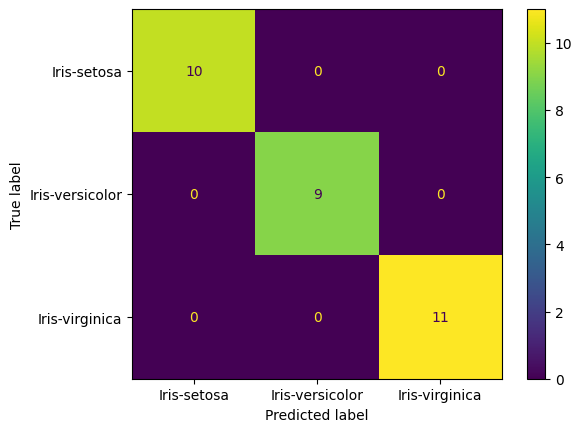

In [15]:
cm = confusion_matrix(y_test , y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df["Species"].unique())
cm_plot.plot()

In [16]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']